In [1]:
import numpy as np
from z3 import *
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
from matplotlib.patches import Rectangle
from skimage.morphology import label
from sympy import binomial
from fractions import Fraction

### Puzzle as published 
https://www.janestreet.com/puzzles/the-marshy-mess-index/

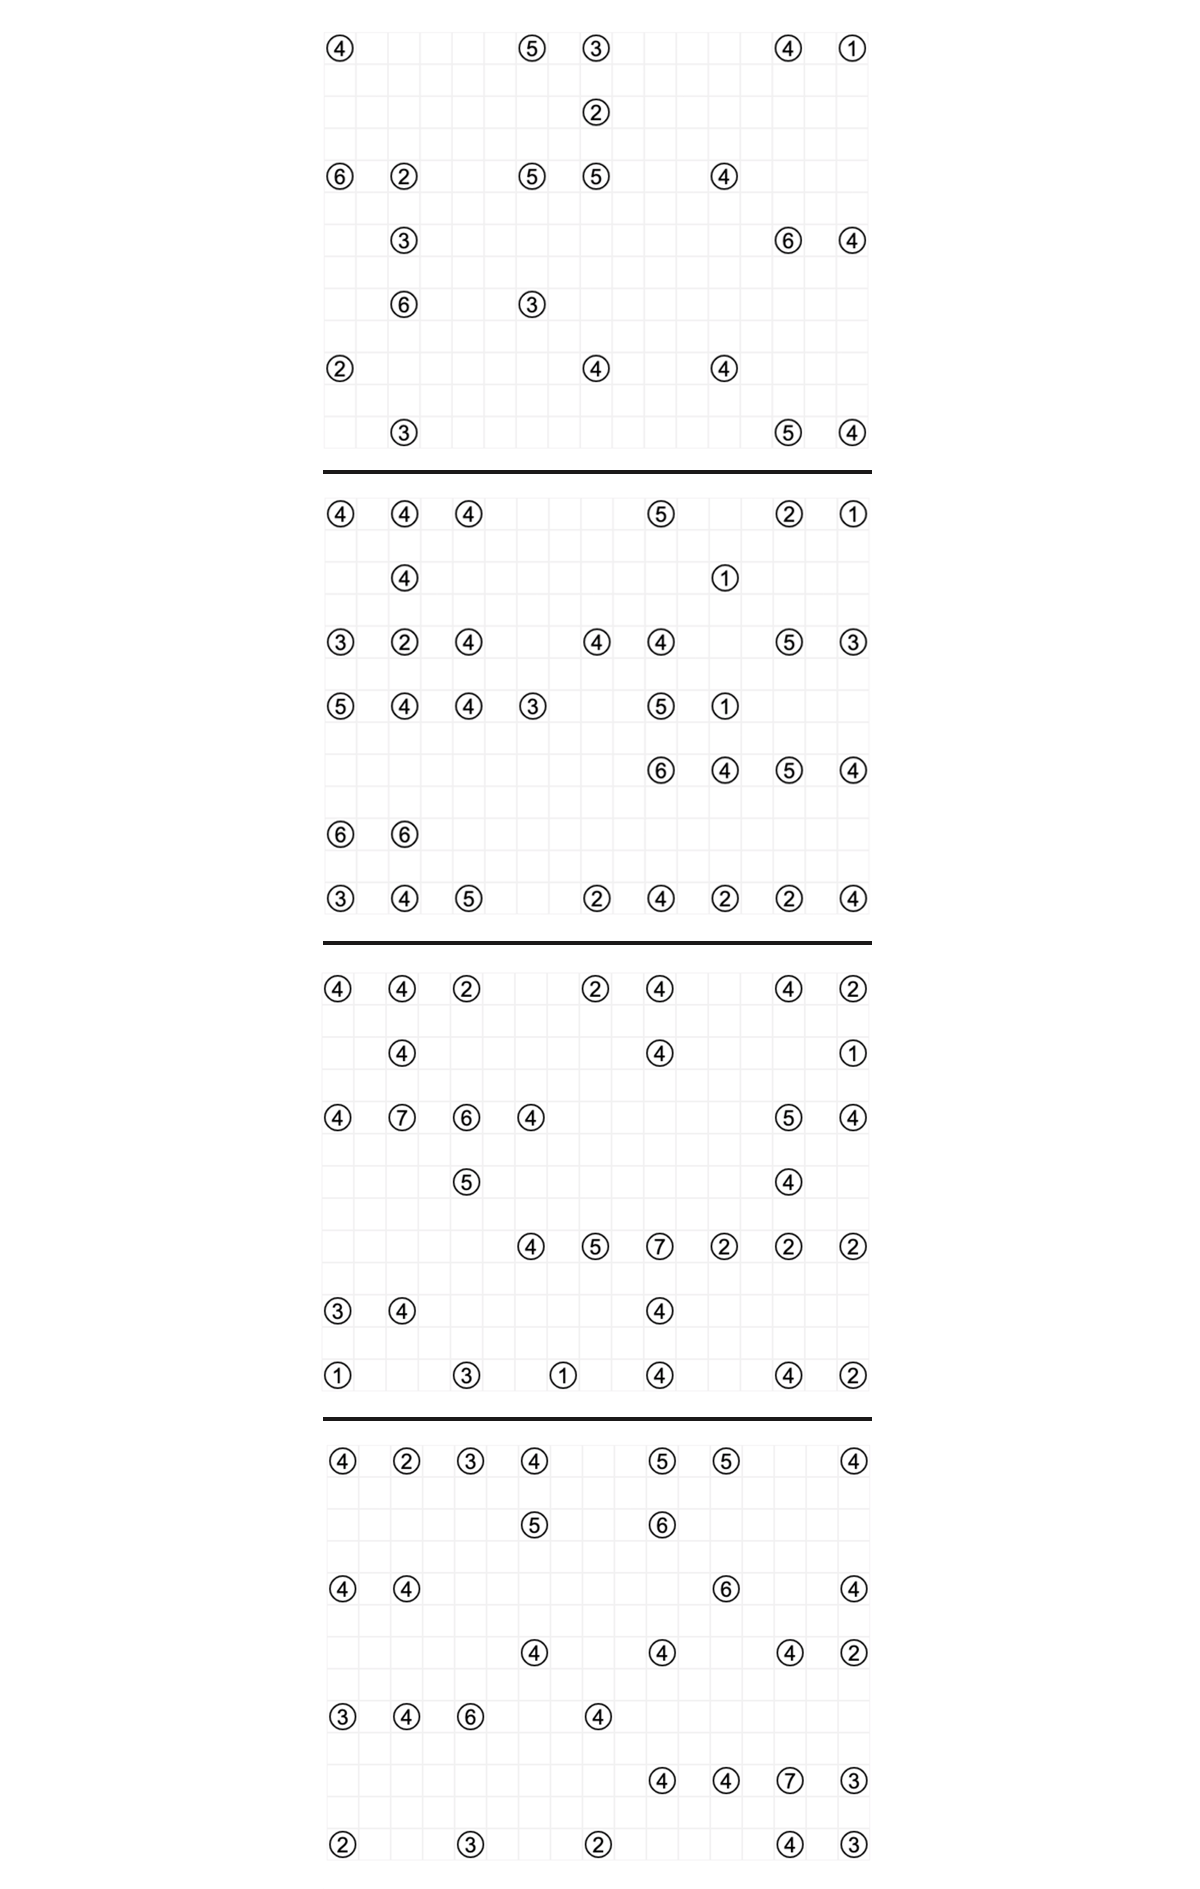

In [2]:
url='https://www.janestreet.com/puzzles/the-marshy-mess-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/the-marshy-mess.png',width=600))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))

In [3]:
t1 =np.array([[4, 0, 0, 0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 4, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [6, 0, 2, 0, 0, 0, 5, 0, 5, 0, 0, 0, 4, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 6, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4]])

t2 = np.array([[4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [3, 0, 2, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 5, 0, 3],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [5, 0, 4, 0, 4, 0, 3, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 5, 0, 4],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [3, 0, 4, 0, 5, 0, 0, 0, 2, 0, 4, 0, 2, 0, 2, 0, 4]])

t3 =np.array([[4, 0, 4, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 0, 4, 0, 2],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [4, 0, 7, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 4, 0, 5, 0, 7, 0, 2, 0, 2, 0, 2],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 4, 0, 0, 0, 4, 0, 2]])

t4 =np.array([[4, 0, 2, 0, 3, 0, 4, 0, 0, 0, 5, 0, 5, 0, 0, 0, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [3, 0, 4, 0, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 7, 0, 3],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 3]])



In [4]:
def solve(grid):    
    start = time.time()

    s = Tactic("qffd").solver()

    # set up bridges and addon
    bridge = {}
    addon = {}
    X ={}
    N= grid.shape

    for i in range(N[0]):
        for j in range(N[1]):
            if grid[i,j] !=0:
                addon[(i,j)] = Int("add_{:.0f}{:.0f}".format(i,j))
                s += And(addon[(i,j)]>=-3,addon[(i,j)] <=3)

            for n in ["u","d","r","l"]:
                bridge[i,j,n]= Int("%d,%d,%s" % (i,j,n))
                s += And(bridge[(i,j,n)]>=0,bridge[(i,j,n)] <=2)

    # only one addon per field
    s += PbEq([(e !=0,1) for (i,j),e in addon.items() ],1)
        
    #set up the bridges
    for i in range(N[0]):
        for j in range(N[1]):
                u = bridge[(i,j,"u")]
                d = bridge[(i,j,"d")]
                l = bridge[(i,j,"l")]
                r = bridge[(i,j,"r")]
                X[(i,j)]= u+d+l+r

                # empty cells
                if grid[i,j] ==0:
                    s += u == d
                    s += l == r
                    s += Or(u==0,l ==0)

                # filled cells
                else:
                    s += int(grid[i,j]) == u+d+r+l - addon[(i,j)]

                #edges
                if i ==0:
                    s += u==0
                if i ==N[0]-1:
                    s += d==0
                if j ==0:
                    s += l==0
                if j ==N[1]-1:
                    s += r==0

    #cells join up
    for i in range(N[0]):
        for j in range(N[1]):
            if i != N[0]-1:
                s += bridge[(i,j,"d")] == bridge[(i+1,j,"u")]
            if j != N[1]-1:
                s += bridge[(i,j,"r")] == bridge[(i,j+1,"l")]

    #connectivity
    def neighbours(i,j,N):
        return [[i+x,j+y] for (x,y) in [(-1,0),(0,-1),(1,0),(0,1)] if i+x>=0 and i+x <N[0] and j+y>=0 and j+y <N[1]]   

    connectivity = True

    if connectivity:
        #print("Doing connectivity")
        edge ={}
        Z = np.array(IntVector('z', np.product(N)),dtype=object).reshape(*N)

        # create edges and variable to define order in connectivity tree
        for i in range(N[0]):
            for j in range(N[1]):  
                for (k,l) in neighbours(i,j,N):
                    edge[(i,j,k,l)] = Int("e%d%d%d%d" % (i,j,k,l))
                    s+=Or(edge[(i,j,k,l)] ==0,edge[(i,j,k,l)] ==1)

        # no edges into or out of unfilled cells. Only one edge per cell     
        for i in range(N[0]):
            for j in range(N[1]):       
                s += Implies(X[i,j] ==0 , Sum([edge[(k,l,i,j)] for (k,l) in neighbours(i,j,N)]) == 0)
                s += Implies(X[i,j] ==0 , Sum([edge[(i,j,k,l)] for (k,l) in neighbours(i,j,N)]) == 0)
                s += Implies(X[i,j] > 0 , Sum([edge[(k,l,i,j)] for (k,l) in neighbours(i,j,N)]) <= 1)

                for (k,l) in neighbours(i,j,N):
                    # Make edges one way to form a tree
                    s += (edge[(i,j,k,l)] + edge[(k,l,i,j)]) <= 1

        # limit the order values
        s += [And(e>= 0 ,e <=int(np.product(N))) for (i,j),e in np.ndenumerate(Z)]

        # order is ascending along edges
        for i in range(N[0]):
            for j in range(N[1]):            
                s += [Implies(And(X[i,j]!=0,edge[(k,l,i,j)]==1),Z[i,j] > Z[k,l]) for (k,l) in neighbours(i,j,N)]

        # only one cell with no feed in => root
        s += PbEq([(And(X[i,j] != 0,Sum([edge[(k,l,i,j)] for (k,l) in neighbours(i,j,N) ]) == 0),1) for i in range(N[0]) for j in range(N[1])],1)           

    # solve    
    if s.check() == sat:
        m = s.model()
        evalu = lambda x:m.evaluate(x).as_long()
        result = {}
        result =  {(i,j,n):evalu(e) for (i,j,n),e in bridge.items()} 
        add_result =   {(i,j):evalu(e) for (i,j),e in addon.items()}
        if connectivity:
            edge_result =   {(i,j,k,l) for (i,j,k,l),e in edge.items() if evalu(e) ==1}

        # turn into a grid again
        out = np.zeros((grid.shape[0],grid.shape[1]),dtype=object)
        out = np.array((out).astype('int').astype('str'))
        out[out=="0"] =" "
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if grid[i,j] == 0:
                    u = result[(i,j,"u")]
                    l = result[(i,j,"l")]
                    if u>0:
                        out[i,j] = " |\u2016#"[u]
                    if l>0:
                        out[i,j] = " -=\u2261"[l]
                else:
                    out[i,j] = grid[i,j]+add_result[i,j]
                    
        if np.max(label(out !=' ',connectivity=1))>=1:
            fig,ax = plt.subplots(1,1,figsize=(grid.shape[1]/4,grid.shape[0]/4))
            highlight = np.vectorize(lambda x:x not in [' ','-','|'])
            ax =sns.heatmap(highlight(out) ,annot=out,cbar=False,cmap="Blues",fmt="",linewidths=1,annot_kws={"size":10},linecolor='k')
            if connectivity:
                for (y,x,b,a) in edge_result:
                    plt.arrow(x+0.5,y+0.5,a-x,b-y,color="r",head_width=0.25,head_length=0.25,length_includes_head=True,alpha=0.2)
            for (i,j),e in add_result.items():
                if e!=0:
                    ax.add_patch(Rectangle((j,i), 1, 1, fill=False, edgecolor='r', lw=3))

            ax.axis("off")
            plt.show()        
            #print([(i,j,e) for (i,j),e in add_result.items() if e !=0])
            print("Took {:.4f} seconds. Connect = {}".format(time.time()-start,np.max(label(out !=' ',connectivity=1))))
        
            s += Or([e != result[(i,j,n)] for (i,j,n),e in bridge.items()]+[add_result[(i,j)] !=e for (i,j),e in addon.items()])
            if s.check() == sat:
                print("NOT UNIQUE")
            else:
               print("UNIQUE !!!!!!!!!!!") 
    else:
        print("fail")

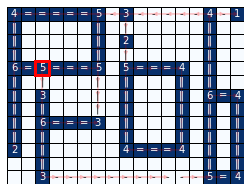

Took 2.3624 seconds. Connect = 1
UNIQUE !!!!!!!!!!!


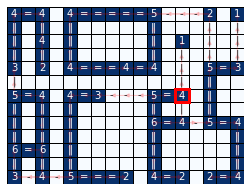

Took 2.2348 seconds. Connect = 1
UNIQUE !!!!!!!!!!!


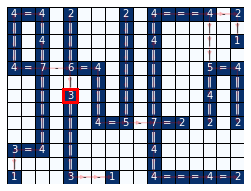

Took 2.2138 seconds. Connect = 1
UNIQUE !!!!!!!!!!!


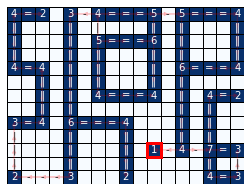

Took 2.3724 seconds. Connect = 1
UNIQUE !!!!!!!!!!!


In [5]:
solve(t1)
solve(t2)
solve(t3)
solve(t4)    

In [6]:
# PROB NO ACES GIVEN SHAPE

# i.e. for a bridge hand by suit 5,4,3,1
# so number of ways of getting that shape without aces divided by chance with (i.e. using 12 cards or 13 per suit)

numerator  = np.prod([binomial(12,i) for i in [5,4,3,1]])
denominator = np.prod([binomial(13,i) for i in [5,4,3,1]])

print("Solution is :",Fraction(numerator,denominator))

Solution is : 8640/28561


### Solution as published 
https://www.janestreet.com/puzzles/the-marshy-mess-solution/

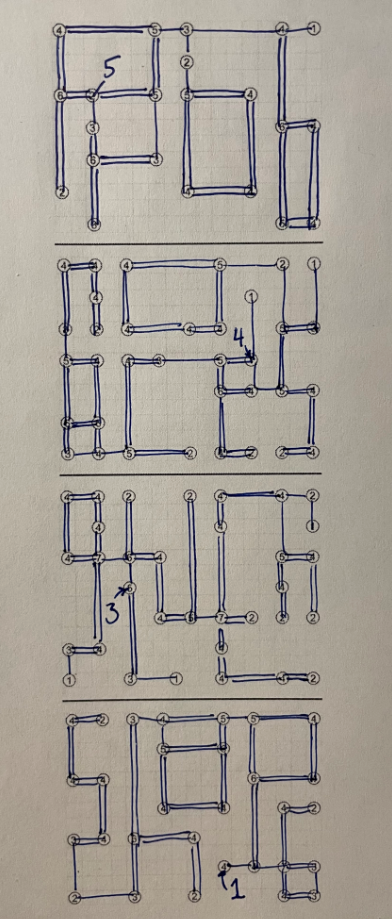

In [7]:
url='https://www.janestreet.com/puzzles/the-marshy-mess-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Solution as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/the-marshy-mess-solution.png',width=600))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))